# Naïve Bayes

TODO: def

### Importing the dataset

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style("whitegrid")

In [15]:
dataset = pd.read_csv('./filez/Social_Network_Ads.csv')
dataset.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


### EDA

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

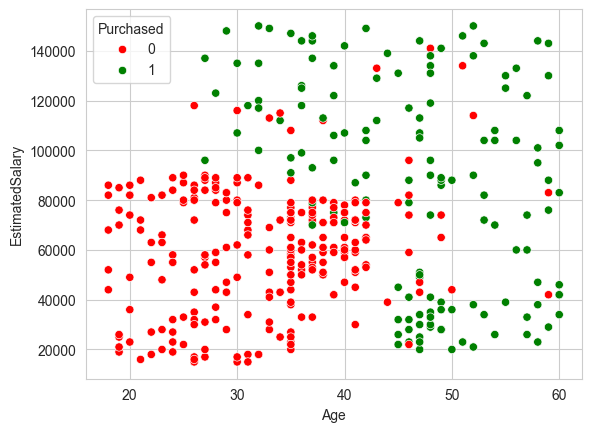

In [16]:
sns.scatterplot(
    dataset,
    x="Age",
    y="EstimatedSalary",
    hue="Purchased",
    palette={0: "red", 1: "green"},
)

### Splitting the dataset into the Train/Test set

In [17]:
from sklearn.model_selection import train_test_split

X = dataset.drop("Purchased", axis=1)
y = dataset["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Function for visualizing Test set results

In [19]:
def show_test_scatter(classifier):
    # Reverse the scaling of the test set
    X_test_inv = sc.inverse_transform(X_test)

    # Convert the scaled test set back to a DataFrame
    X_test_inv_df = pd.DataFrame(X_test_inv, columns=["Age", "EstimatedSalary"])

    # Add the predictions to this DataFrame
    y_pred = classifier.predict(X_test)
    X_test_inv_df["Purchased"] = y_pred

    # Show the scatter plot
    sns.scatterplot(
        data=X_test_inv_df,
        x="Age",
        y="EstimatedSalary",
        hue="Purchased",
        palette={0: "red", 1: "green"},
    )
    plt.title("Naïve Bayes (Testing set)")
    plt.show()

### Function for visualizing Test set results including decision boundary

In [20]:
# shows decision boundary
def show_train_scatter_boundary(classifier):
    X_set, y_set = sc.inverse_transform(X_test), y_test
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
        np.arange(
            start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25
        ),
    )

    # Prepare mesh grid as DataFrame for transformation
    mesh_df = pd.DataFrame(
        np.c_[X1.ravel(), X2.ravel()], columns=["Age", "EstimatedSalary"]
    )

    # Predict using the transformed mesh grid
    Z = classifier.predict(sc.transform(mesh_df)).reshape(X1.shape)

    # Plot the decision regions
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(("red", "green")))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Define colors for each class
    colors = ["red", "green"]

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j
        )

    plt.title("Naïve Bayes (Testing set)")
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")
    plt.legend()
    plt.show()

### Function for Evaluating the Model

In [21]:
def evaluate_model(classifier):
    y_pred = classifier.predict(X_test)

    print(f"1) classification_report:\n\n", classification_report(y_test, y_pred))
    print(f"2) confusion_matrix:\n\n", confusion_matrix(y_test, y_pred), "\n")
    print(f"3) accuracy_score:\n\n", accuracy_score(y_test, y_pred))

### Training the Model

In [22]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
classifier.get_params()

{'priors': None, 'var_smoothing': 1e-09}

### Predicting a new result

In [23]:
def make_prediction(age: int, salary: int):
    new_data = pd.DataFrame([[age, salary]], columns=['Age', 'EstimatedSalary'])
    new_pred = classifier.predict(sc.transform(new_data))
    print(f"new prediction for age: {age} & salary: ${salary:,} -> {new_pred[0]}")

make_prediction(19, 19000)
make_prediction(32, 150000)

new prediction for age: 19 & salary: $19,000 -> 0
new prediction for age: 32 & salary: $150,000 -> 1


### Visualising the Test set results

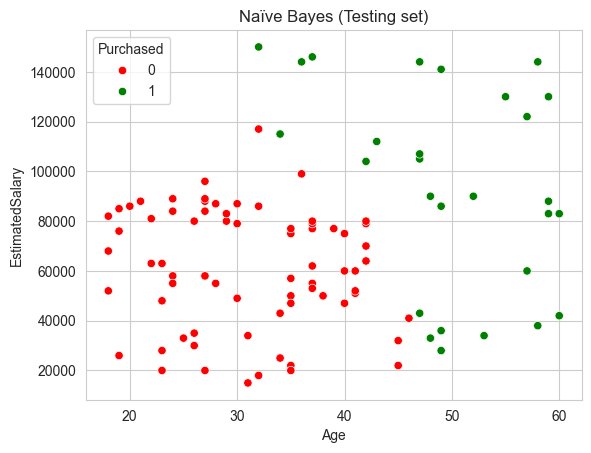

In [24]:
show_test_scatter(classifier)

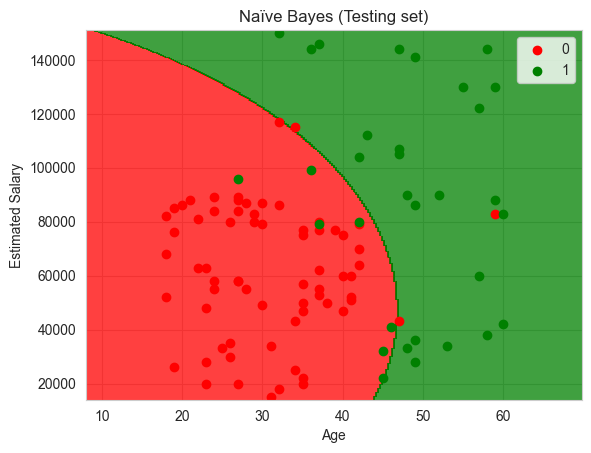

In [25]:
show_train_scatter_boundary(classifier)

### Evaluating the Model

In [26]:
evaluate_model(classifier)

1) classification_report:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100

2) confusion_matrix:

 [[65  3]
 [ 7 25]] 

3) accuracy_score:

 0.9
